# Analysis of Controversy

In [1]:
#Required library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import networkx as nx

from os import listdir, getcwd, chdir
from functools import reduce
from itertools import islice
from networkx.algorithms.community.quality import coverage, modularity

In [2]:
#set font for matplotlib
matplotlib.rcParams['font.sans-serif'] = "Computer Modern Roman"
matplotlib.rcParams['font.family'] = "serif"

## Get communities info

In [3]:
path = "C:/Users/comot/IdeaProjects/echo-chambers/community"
chdir(path)
files_communities: list = listdir()
files_communities

['baltimore_followers_network_part_largest_CC_fluidc_0.csv',
 'baltimore_followers_network_part_largest_CC_fluidc_1.csv',
 'beefban_followers_network_part_largest_CC_fluidc_0.csv',
 'beefban_followers_network_part_largest_CC_fluidc_1.csv',
 'ff_followers_network_part_largest_CC_fluidc_0.csv',
 'ff_followers_network_part_largest_CC_fluidc_1.csv',
 'germanwings_followers_network_part_largest_CC_fluidc_0.csv',
 'germanwings_followers_network_part_largest_CC_fluidc_1.csv',
 'gunsense_followers_network_part_largest_CC_fluidc_0.csv',
 'gunsense_followers_network_part_largest_CC_fluidc_1.csv',
 'indiana_followers_network_part_largest_CC_fluidc_0.csv',
 'indiana_followers_network_part_largest_CC_fluidc_1.csv',
 'indiasdaughter_followers_network_part_largest_CC_fluidc_0.csv',
 'indiasdaughter_followers_network_part_largest_CC_fluidc_1.csv',
 'jurassicworld_followers_network_part_largest_CC_fluidc_0.csv',
 'jurassicworld_followers_network_part_largest_CC_fluidc_1.csv',
 'leadersdebate_followers_

In [4]:
communities = ["baltimore",
               "gunsense",
               "netanyahu",
               "ukraine",
               "russia",
               "sxsw",
               "germanwings",
               "ultralive",
               "onedirection"]

communities_to_analyse = []
for c in communities:
    for f in files_communities:
        if c in f:
            communities_to_analyse.append(f)

In [5]:
len(communities_to_analyse), communities_to_analyse

(18,
 ['baltimore_followers_network_part_largest_CC_fluidc_0.csv',
  'baltimore_followers_network_part_largest_CC_fluidc_1.csv',
  'gunsense_followers_network_part_largest_CC_fluidc_0.csv',
  'gunsense_followers_network_part_largest_CC_fluidc_1.csv',
  'netanyahu_followers_network_part_largest_CC_fluidc_0.csv',
  'netanyahu_followers_network_part_largest_CC_fluidc_1.csv',
  'ukraine_followers_network_part_largest_CC_fluidc_0.csv',
  'ukraine_followers_network_part_largest_CC_fluidc_1.csv',
  'russia_march_followers_network_part_largest_CC_fluidc_0.csv',
  'russia_march_followers_network_part_largest_CC_fluidc_1.csv',
  'sxsw_followers_network_part_largest_CC_fluidc_0.csv',
  'sxsw_followers_network_part_largest_CC_fluidc_1.csv',
  'germanwings_followers_network_part_largest_CC_fluidc_0.csv',
  'germanwings_followers_network_part_largest_CC_fluidc_1.csv',
  'ultralive_followers_network_part_largest_CC_fluidc_0.csv',
  'ultralive_followers_network_part_largest_CC_fluidc_1.csv',
  'onedir

In [6]:
def read_communities(file):
    df = pd.read_csv(file, header=None, names = ["nodes"])
    return set(df['nodes'].astype(str))

In [7]:
communities_dict = {key: read_communities(key) for key in communities_to_analyse}

In [8]:
len(communities_dict["baltimore_followers_network_part_largest_CC_fluidc_0.csv"]) + len(communities_dict["baltimore_followers_network_part_largest_CC_fluidc_1.csv"])

1441

In [9]:
def get_communities(communities_dict: dict):
    communities = []
    while len(communities_dict.keys()) != 0:
        tmp = dict(islice(communities_dict.items(), 2))
        communities.append(tmp)
        for key in tmp.keys():
            communities_dict.pop(key, None)
    return communities

In [10]:
communities_final = get_communities(communities_dict)

## Get graph info

In [11]:
path = "C:/Users/comot/IdeaProjects/echo-chambers/data"
chdir(path)
files: list = list(filter(lambda x: not x.endswith("xf"), listdir()))
files

['baltimore_followers_network_part_largest_CC.txt',
 'beefban_followers_network_part_largest_CC.txt',
 'ff_followers_network_part_largest_CC.txt',
 'germanwings_followers_network_part_largest_CC.txt',
 'gunsense_followers_network_part_largest_CC.txt',
 'indiana_followers_network_part_largest_CC.txt',
 'indiasdaughter_followers_network_part_largest_CC.txt',
 'jurassicworld_followers_network_part_largest_CC.txt',
 'leadersdebate_followers_network_part_largest_CC.txt',
 'mothersday_followers_network_part_largest_CC.txt',
 'nemtsov_followers_network_part_largest_CC.txt',
 'nepal_followers_network_part_largest_CC.txt',
 'netanyahu_followers_network_part_largest_CC.txt',
 'onedirection_followers_network_part_largest_CC.txt',
 'russia_march_followers_network_part_largest_CC.txt',
 'sxsw_followers_network_part_largest_CC.txt',
 'ukraine_followers_network_part_largest_CC.txt',
 'ultralive_followers_network_part_largest_CC.txt']

In [12]:
def create_graph(file: str):
    return nx.read_weighted_edgelist(file, delimiter=",")

def get_graph_info(graph: nx.Graph):
    n_edges = graph.number_of_edges()
    n_nodes = len(graph)
    return n_nodes, n_edges

In [13]:
graphs = list(map(lambda file: create_graph(file), files))
graphs_info = map(lambda graph: get_graph_info(graph), graphs)
graphs_details = dict(zip(files,graphs_info))
graphs_details

{'baltimore_followers_network_part_largest_CC.txt': (1441, 28291),
 'beefban_followers_network_part_largest_CC.txt': (799, 6026),
 'ff_followers_network_part_largest_CC.txt': (3899, 63672),
 'germanwings_followers_network_part_largest_CC.txt': (2111, 7329),
 'gunsense_followers_network_part_largest_CC.txt': (1821, 103840),
 'indiana_followers_network_part_largest_CC.txt': (946, 24328),
 'indiasdaughter_followers_network_part_largest_CC.txt': (1542, 9480),
 'jurassicworld_followers_network_part_largest_CC.txt': (4395, 31802),
 'leadersdebate_followers_network_part_largest_CC.txt': (9566, 344088),
 'mothersday_followers_network_part_largest_CC.txt': (2225, 14160),
 'nemtsov_followers_network_part_largest_CC.txt': (2156, 46529),
 'nepal_followers_network_part_largest_CC.txt': (4242, 42833),
 'netanyahu_followers_network_part_largest_CC.txt': (4292, 297136),
 'onedirection_followers_network_part_largest_CC.txt': (3151, 20275),
 'russia_march_followers_network_part_largest_CC.txt': (1189, 1

In [14]:
#Get coverage
graphs_name = dict(zip(files, graphs))
graphs_name_dict = {}
for c in communities:
    for f in graphs_name.keys():
        if c in f:
            graphs_name_dict[graphs_name[f]] = f     

In [15]:
graph_and_communities = dict(zip(list(graphs_name_dict.keys()), communities_final))

In [16]:
len(graph_and_communities)

9

In [17]:
def get_coverage(graph_and_communities):
    df_result = pd.DataFrame(columns=["Graph","Coverage"])
    for graph in graph_and_communities.keys():
        cov = round(coverage(graph, graph_and_communities[graph].values()), 4)
        print("Done")
        df_result = df_result.append(
            {"Graph": list(graph_and_communities[graph].keys())[0],
             "Coverage": cov},
            ignore_index=True
        )
    return df_result

In [18]:
cov_graphs = get_coverage(graph_and_communities)

Done
Done
Done
Done
Done
Done
Done
Done
Done


In [19]:
cov_graphs.sort_values(by=['Coverage'], ascending=False)

,Graph,Coverage
1,gunsense_followers_network_part_largest_CC_flu...,0.9927
0,baltimore_followers_network_part_largest_CC_fl...,0.9825
2,netanyahu_followers_network_part_largest_CC_fl...,0.9766
3,ukraine_followers_network_part_largest_CC_flui...,0.9623
4,russia_march_followers_network_part_largest_CC...,0.9621
6,germanwings_followers_network_part_largest_CC_...,0.9169
8,onedirection_followers_network_part_largest_CC...,0.8858
7,ultralive_followers_network_part_largest_CC_fl...,0.8610
5,sxsw_followers_network_part_largest_CC_fluidc_...,0.8300


## Standard results - Analysis

In [20]:
controversial: list = ["gunsense_followers_network_part_largest_CC.csv",
                       "netanyahu_followers_network_part_largest_CC.csv",
                       "russia_march_followers_network_part_largest_CC.csv"
                      ]
# controversial: list = ["baltimore_followers_network_part_largest_CC.csv",
#                        "gunsense_followers_network_part_largest_CC.csv",
#                        "netanyahu_followers_network_part_largest_CC.csv",
#                        "ukraine_followers_network_part_largest_CC.csv",
#                        "russia_march_followers_network_part_largest_CC.csv"
#                       ]
non_controversial: list = ["sxsw_followers_network_part_largest_CC.csv",
                           "germanwings_followers_network_part_largest_CC.csv",
                           "ultralive_followers_network_part_largest_CC.csv",
                           "onedirection_followers_network_part_largest_CC.csv"
                          ]

In [21]:
path_standard_result = "C:/Users/comot/IdeaProjects/echo-chambers/result_standard/"
chdir(path_standard_result)
files_standard_result: list = listdir()
files_standard_result

['baltimore_followers_network_part_largest_CC.csv',
 'beefban_followers_network_part_largest_CC.csv',
 'ff_followers_network_part_largest_CC.csv',
 'germanwings_followers_network_part_largest_CC.csv',
 'gunsense_followers_network_part_largest_CC.csv',
 'indiana_followers_network_part_largest_CC.csv',
 'indiasdaughter_followers_network_part_largest_CC.csv',
 'jurassicworld_followers_network_part_largest_CC.csv',
 'leadersdebate_followers_network_part_largest_CC.csv',
 'mothersday_followers_network_part_largest_CC.csv',
 'nemtsov_followers_network_part_largest_CC.csv',
 'nepal_followers_network_part_largest_CC.csv',
 'netanyahu_followers_network_part_largest_CC.csv',
 'onedirection_followers_network_part_largest_CC.csv',
 'russia_march_followers_network_part_largest_CC.csv',
 'sxsw_followers_network_part_largest_CC.csv',
 'ukraine_followers_network_part_largest_CC.csv',
 'ultralive_followers_network_part_largest_CC.csv']

In [22]:
len(files) == len(files_standard_result)

True

In [23]:
standard_result = dict(zip(files_standard_result, map(lambda file: pd.read_csv(file), files_standard_result)))
non_controversial_std_result = {key: value for key, value in standard_result.items() if key in non_controversial}
controversial_std_result = {key: value for key, value in standard_result.items() if key in controversial}

In [24]:
# Create one dataframe
non_controversial_std_df = pd.concat(non_controversial_std_result.values())
non_controversial_std_df["Controversial"] = "N"
controversial_std_df = pd.concat(controversial_std_result.values())
controversial_std_df["Controversial"] = "Y"

In [25]:
# Try to get insight
non_controversial_std_df.describe()

,Unnamed: 0,RWC_pre,RWC_post,GMCK_pre,GMCK_post,ForceAtlas_pre,ForceAtlas_post,Original_edges,New_edges,Number_edges_added,Percentage_edges_added
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000
mean,2.500000,0.589125,0.470217,0.054925,0.023587,0.238625,0.216458,33757.500000,34757.500000,1000.0,0.000325
std,1.744557,0.101911,0.096057,0.100488,0.084841,0.084652,0.075820,34303.041862,34303.041862,0.0,0.000182
min,0.000000,0.489800,0.237000,-0.106600,-0.146200,0.105300,0.083600,7329.000000,8329.000000,1000.0,0.000100
25%,1.000000,0.502175,0.419325,0.022925,-0.010875,0.203475,0.147600,13884.750000,14884.750000,1000.0,0.000175
50%,2.500000,0.564750,0.488800,0.085900,0.056450,0.263650,0.234500,18172.500000,19172.500000,1000.0,0.000350
75%,4.000000,0.651700,0.504975,0.117900,0.083625,0.298800,0.285800,38045.250000,39045.250000,1000.0,0.000500
max,5.000000,0.737200,0.644100,0.154500,0.141900,0.321900,0.338900,91356.000000,92356.000000,1000.0,0.000500


In [26]:
controversial_std_df.describe()

,Unnamed: 0,RWC_pre,RWC_post,GMCK_pre,GMCK_post,ForceAtlas_pre,ForceAtlas_post,Original_edges,New_edges,Number_edges_added,Percentage_edges_added
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.000000
mean,2.500000,0.903333,0.833972,0.332333,0.244861,0.594000,0.547944,139149.000000,140149.000000,1000.0,0.000700
std,1.757338,0.040454,0.098323,0.069576,0.104578,0.091533,0.091624,120669.469798,120669.469798,0.0,0.000551
min,0.000000,0.855200,0.633800,0.281700,0.000000,0.530800,0.415600,16471.000000,17471.000000,1000.0,0.000100
25%,1.000000,0.855200,0.744500,0.281700,0.190575,0.530800,0.476100,16471.000000,17471.000000,1000.0,0.000100
50%,2.500000,0.903300,0.888850,0.287400,0.266900,0.531400,0.518200,103840.000000,104840.000000,1000.0,0.000600
75%,4.000000,0.951500,0.900925,0.427900,0.297900,0.719800,0.648350,297136.000000,298136.000000,1000.0,0.001400
max,5.000000,0.951500,0.925800,0.427900,0.407400,0.719800,0.697200,297136.000000,298136.000000,1000.0,0.001400


In [27]:
# Create dataframe for visualization
results = pd.concat([controversial_std_df,non_controversial_std_df])
controversy = results[["RWC_pre","ForceAtlas_pre","GMCK_pre","Controversial"]].rename(columns={'RWC_pre': 'RWC', 'ForceAtlas_pre': 'EC','GMCK_pre':'BCC'}, inplace=False)

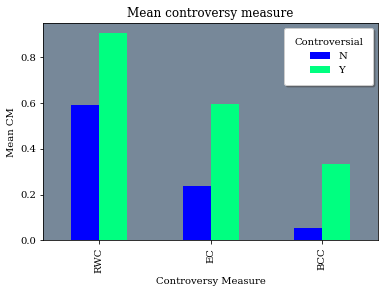

In [28]:
ax = controversy.groupby(['Controversial']).mean().transpose().plot(kind="bar", title="Mean controversy measure", colormap='winter')
ax.set_facecolor("lightslategray")
ax.set_xlabel("Controversy Measure")
ax.set_ylabel("Mean CM")
ax.legend(loc="best", frameon=True, title= "Controversial", framealpha=1, shadow=True, borderpad=1)
# fig = ax.get_figure()
# fig.savefig("output.png", bbox_inches='tight')

Text(0.39233333333333326, 3.06, '$\\mu =$0.33')

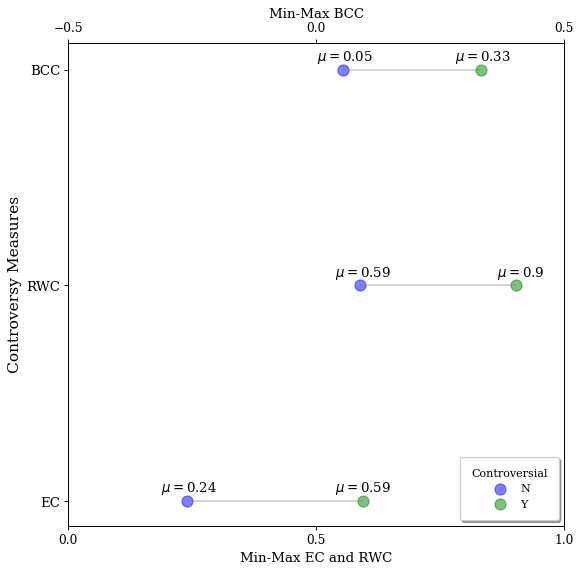

In [29]:
ordered_df = controversy[['RWC','EC','Controversial']].groupby(['Controversial']).mean().transpose().sort_values(by='N')
my_range=[1,2]

plt.subplots(1,1,figsize=(8,8), dpi=80)
plt.hlines(y=my_range, xmin=ordered_df['N'], xmax=ordered_df['Y'], color='grey', alpha=0.4, )
plt.scatter(ordered_df['N'], my_range, color='blue', alpha=0.5, label='N', s=100)
plt.scatter(ordered_df['Y'], my_range, color='green', alpha=0.5 , label='Y', s=100)
plt.legend(loc="lower right", frameon=True, title= "Controversial", framealpha=1, shadow=True, borderpad=1)

# Add title and axis names
plt.yticks([1,2,3], ['EC', 'RWC', 'BCC'], size=12)
plt.xlim([0,1])
plt.xticks(np.arange(0, 1.1, 0.5), size=11)
my_xticks = list(round(ordered_df["N"],2)) + list(round(ordered_df["Y"], 2))
points = list(zip(my_xticks, list(my_range) + list(my_range)))
for p in points:
    plt.text(p[0]+0.06, p[1]+0.06, "$\mu =$" + str(p[0]), horizontalalignment='right', verticalalignment='center', fontdict={'size':12})
    
#plt.title("Comparison of CM", loc='center', fontdict={'size':16, 'weight':700})
plt.xlabel('Min-Max EC and RWC', fontdict={'size':12})

plt.ylabel('Controversy Measures',fontdict={'size':14})
plt.twiny().set_xlim([-0.5,0.5])
plt.xticks(np.arange(-0.5, 0.6, 0.5), size = 11)
plt.xlabel("Min-Max BCC", fontdict={'size':12})

ordered_df1 = controversy[['BCC','Controversial']].groupby(['Controversial']).mean().transpose().sort_values(by='N')
my_range1=3
plt.hlines(y=[3,3], xmin=ordered_df1['N'], xmax=ordered_df1['Y'], color='grey', alpha=0.2)
plt.scatter(ordered_df1['N'], my_range1, color='blue', alpha=0.5, label='N', s=100)
plt.scatter(ordered_df1['Y'], my_range1, color='green', alpha=0.5 , label='Y', s=100)
plt.text(float(ordered_df1["N"])+0.06, 3+0.06, "$\mu =$" + str(round(float(ordered_df1["N"]),2)), horizontalalignment='right', verticalalignment='center', fontdict={'size':12})
plt.text(float(ordered_df1["Y"])+0.06, 3+0.06, "$\mu =$" + str(round(float(ordered_df1["Y"]),2)), horizontalalignment='right', verticalalignment='center', fontdict={'size':12})
# plt.savefig("variant_mean_controversy2.png", bbox_inches='tight')

In [30]:
# Analysis on link prediction result
results.shape

(42, 13)

In [31]:
gunsense_gmck = results[(results["Controversial"] == "Y" ) & (results["GMCK_pre"] == 0.2817)].round(2)
gunsense_gmck

,Unnamed: 0,Algorithm,RWC_pre,RWC_post,GMCK_pre,GMCK_post,ForceAtlas_pre,ForceAtlas_post,Original_edges,New_edges,Number_edges_added,Percentage_edges_added,Controversial
0,0,BETWEENNESS,0.86,0.72,0.28,0.09,0.53,0.46,16471,17471,1000,0.0,Y
1,1,EFFECTIVE_SIZE,0.86,0.70,0.28,0.00,0.53,0.47,16471,17471,1000,0.0,Y
2,2,JACCARD_COEFFICIENT,0.86,0.81,0.28,0.19,0.53,0.49,16471,17471,1000,0.0,Y
3,3,ADAMIC_ADAR,0.86,0.67,0.28,0.18,0.53,0.47,16471,17471,1000,0.0,Y
4,4,RESOURCE_ALLOCATION,0.86,0.70,0.28,0.19,0.53,0.46,16471,17471,1000,0.0,Y
5,5,PREFERENTIAL_ATTACHMENT,0.86,0.63,0.28,0.19,0.53,0.42,16471,17471,1000,0.0,Y


RESOURCE_ALLOCATION has to be added at position 0.19
PREFERENTIAL_ATTACHMENT has to be added at position 0.19


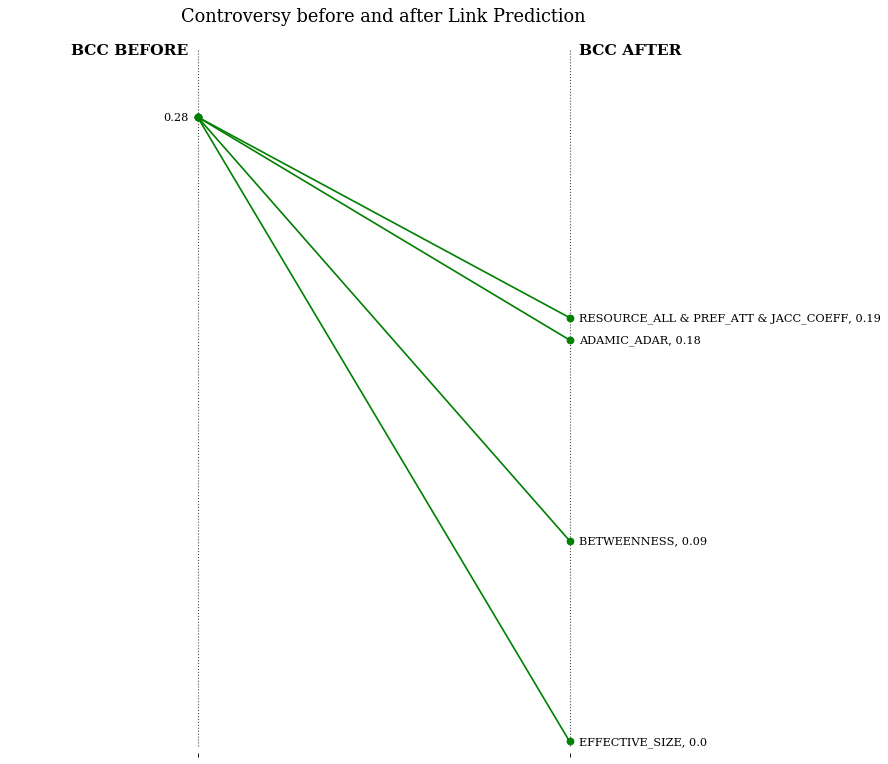

In [32]:
# Draw line
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='green' if p1[1]-p2[1] > 0 else 'red', marker='o', markersize=6)
    ax.add_line(l)
    return l

left_label = [str(c) + ', '+ str(y) for c, y in zip(gunsense_gmck.Algorithm, gunsense_gmck['GMCK_pre'])]
right_label = [str(c) + ', '+ str(y) for c, y in zip(gunsense_gmck.Algorithm, gunsense_gmck['GMCK_post'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(gunsense_gmck['GMCK_pre'], gunsense_gmck['GMCK_post'])]

# left_label = [str(c) + ', '+ str(y) for c, y in zip(gunsense_gmck.Algorithm, gunsense_gmck['RWC_pre'])]
# right_label = [str(c) + ', '+ str(y) for c, y in zip(gunsense_gmck.Algorithm, gunsense_gmck['RWC_post'])]
# klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(gunsense_gmck['RWC_pre'], gunsense_gmck['RWC_post'])]

# left_label = [str(c) + ', '+ str(y) for c, y in zip(gunsense_gmck.Algorithm, gunsense_gmck['ForceAtlas_pre'])]
# right_label = [str(c) + ', '+ str(y) for c, y in zip(gunsense_gmck.Algorithm, gunsense_gmck['ForceAtlas_post'])]
# klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(gunsense_gmck['ForceAtlas_pre'], gunsense_gmck['ForceAtlas_post'])]

fig, ax = plt.subplots(1,1,figsize=(12,12), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=np.min(gunsense_gmck['GMCK_post'])-0.002, ymax=np.mean(gunsense_gmck['GMCK_pre'])+0.03, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=np.min(gunsense_gmck['GMCK_post'])-0.002, ymax=np.mean(gunsense_gmck['GMCK_pre'])+0.03, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# ax.vlines(x=1, ymin=np.min(gunsense_gmck['RWC_post'])-0.002, ymax=np.mean(gunsense_gmck['RWC_pre'])+0.005, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
# ax.vlines(x=3, ymin=np.min(gunsense_gmck['RWC_post'])-0.002, ymax=np.mean(gunsense_gmck['RWC_pre'])+0.005, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# ax.vlines(x=1, ymin=np.min(gunsense_gmck['ForceAtlas_post'])-0.002, ymax=np.mean(gunsense_gmck['ForceAtlas_pre'])+0.05, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
# ax.vlines(x=3, ymin=np.min(gunsense_gmck['ForceAtlas_post'])-0.002, ymax=np.mean(gunsense_gmck['ForceAtlas_pre'])+0.05, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=gunsense_gmck['GMCK_pre'], x=np.repeat(1, gunsense_gmck.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=gunsense_gmck['GMCK_post'], x=np.repeat(3, gunsense_gmck.shape[0]), s=10, color='black', alpha=0.7)

# ax.scatter(y=gunsense_gmck['RWC_pre'], x=np.repeat(1, gunsense_gmck.shape[0]), s=10, color='black', alpha=0.7)
# ax.scatter(y=gunsense_gmck['RWC_post'], x=np.repeat(3, gunsense_gmck.shape[0]), s=10, color='black', alpha=0.7)

# ax.scatter(y=gunsense_gmck['ForceAtlas_pre'], x=np.repeat(1, gunsense_gmck.shape[0]), s=10, color='black', alpha=0.7)
# ax.scatter(y=gunsense_gmck['ForceAtlas_post'], x=np.repeat(3, gunsense_gmck.shape[0]), s=10, color='black', alpha=0.7)

label = dict()
# Line Segmentsand Annotation
# for p1, p2, c in zip(gunsense_gmck['ForceAtlas_pre'], gunsense_gmck['ForceAtlas_post'], gunsense_gmck['Algorithm']):
# for p1, p2, c in zip(gunsense_gmck['RWC_pre'], gunsense_gmck['RWC_post'], gunsense_gmck['Algorithm']):
for p1, p2, c in zip(gunsense_gmck['GMCK_pre'], gunsense_gmck['GMCK_post'], gunsense_gmck['Algorithm']):
#     #newline([1,p1], [3,p2])
#     if p2 == 0.3911:
#         newline([1,round(p1,2)], [3,0.3925])
#         ax.text(3+0.05, round(p2,2), c + ', ' + str(round(p2,2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
#     elif p2 == 0.3896:
#         newline([1,round(p1,2)], [3,0.387])
#         ax.text(3+0.05, round(p2,2), c + ', ' + str(round(p2,2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
#     else:
    if p2 not in label.values():
        newline([1,p1], [3,p2])
        if p2 == 0.19:
            ax.text(3+0.05, p2, "RESOURCE_ALL & PREF_ATT & JACC_COEFF" + ', ' + str(p2), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
        elif p2 == -9:
            ax.text(3+0.05, p2, "BET + RESOURCE_ALL & BET + PREF_ATTACHMENT" + ', ' + str(p2), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
        else:    
            ax.text(3+0.05, p2, c + ', ' + str(p2), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
    else:
        print(c + " has to be added at position " + str(p2))
    label[c]=p2        

# ax.text(3+0.05, 0.472, "ADAMIC_ADAR" + ', ' + str(0.47), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
# ax.text(3+0.05, 0.462, "RESOURCE_ALLOCATION" + ', ' + str(0.46), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
# ax.text(3+0.05, 0.649, "BETWEENNESS + PREFERENTIAL_ATTACHMENT" + ', ' + str(0.65), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
# ax.text(3+0.05, 0.8902, "BETWEENNESS + PREFERENTIAL_ATTACHMENT" + ', ' + str(0.89), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
# ax.text(3+0.05, 0.8901, "BETWEENNESS + EFFECTIVE_SIZE" + ', ' + str(0.89), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})

ax.text(1-0.05, np.mean(gunsense_gmck['GMCK_pre']), str(np.mean(gunsense_gmck['GMCK_pre'])), horizontalalignment='right', verticalalignment='center', fontdict={'size':10.2})
# ax.text(1-0.05, np.mean(gunsense_gmck['RWC_pre']), str(round(np.mean(gunsense_gmck['RWC_pre']),2)), horizontalalignment='right', verticalalignment='center', fontdict={'size':10.2})
# ax.text(1-0.05, np.mean(gunsense_gmck['ForceAtlas_pre']), str(round(np.mean(gunsense_gmck['ForceAtlas_pre']),2)), horizontalalignment='right', verticalalignment='center', fontdict={'size':10.2})

# 'Before' and 'After' Annotations
ax.text(1-0.05, np.mean(gunsense_gmck['GMCK_pre'])+0.03, 'BCC BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':14, 'weight':700})
ax.text(3+0.05, np.mean(gunsense_gmck['GMCK_pre'])+0.03, 'BCC AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'weight':700})

# ax.text(1-0.05, np.mean(gunsense_gmck['RWC_pre'])+0.005, 'RWC BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':14, 'weight':700})
# ax.text(3+0.05, np.mean(gunsense_gmck['RWC_pre'])+0.005, 'RWC AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'weight':700})

# ax.text(1-0.05, np.max(gunsense_gmck['ForceAtlas_pre'])+0.004, 'EC BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':14, 'weight':700})
# ax.text(3+0.05, np.max(gunsense_gmck['ForceAtlas_pre'])+0.004, 'EC AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'weight':700})

# Decoration
ax.set_title("Controversy before and after Link Prediction", fontdict={'size':16})
ax.set(xlim=(0,4), ylim=(np.min(gunsense_gmck['GMCK_post'])-0.005,np.max(gunsense_gmck['GMCK_pre'])+0.04))
ax.set_xticks([1,3])
ax.set_xticklabels(["", ""])
# ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
plt.yticks([])

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()
path = "C:/Users/comot/Documents/Thesis/pictures/appendix/"
chdir(path)
#fig.savefig('controversy_reduction_russ_gmck.png', bbox_inches='tight')

RESOURCE_ALLOCATION has to be added at position 0.28


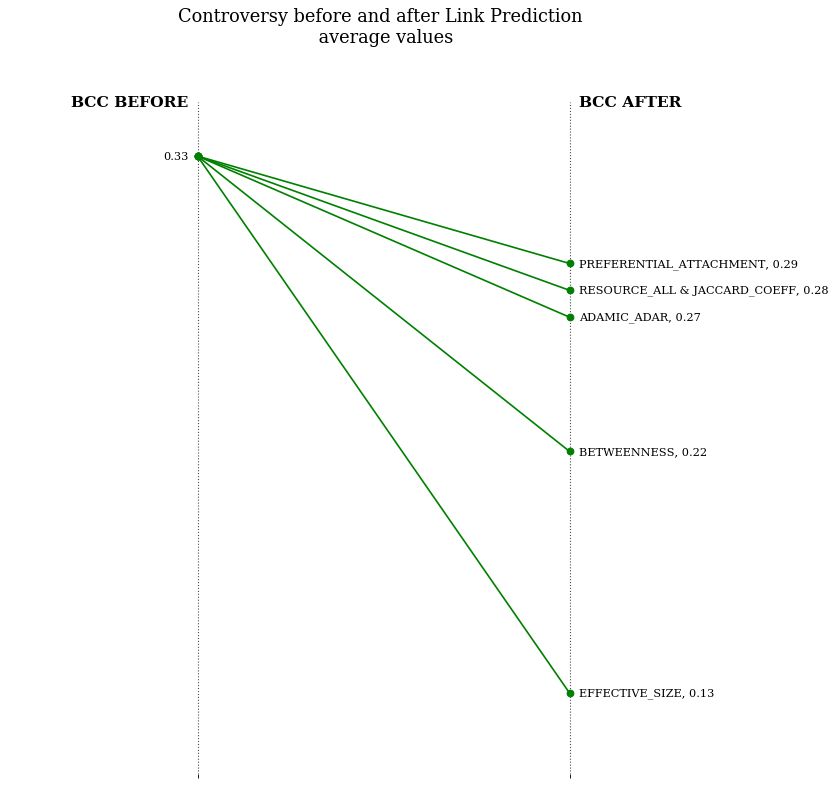

In [47]:
avg_gmck = results[(results["Controversial"] == "Y" )].groupby(['Algorithm']).mean().sort_values(by='GMCK_post').round(2)
left_label = [str(c) + ', '+ str(y) for c, y in zip(avg_gmck.index, avg_gmck['GMCK_pre'])]
right_label = [str(c) + ', '+ str(y) for c, y in zip(avg_gmck.index, avg_gmck['GMCK_post'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(avg_gmck['GMCK_pre'], avg_gmck['GMCK_post'])]

fig, ax = plt.subplots(1,1,figsize=(12,12), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0.10, ymax=0.35, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0.10, ymax=0.35, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
# ax.scatter(y=avg_gmck['GMCK_pre'], x=np.repeat(1, avg_gmck.shape[0]), s=10, color='black', alpha=0.7)
# ax.scatter(y=avg_gmck['GMCK_post'], x=np.repeat(3, avg_gmck.shape[0]), s=10, color='black', alpha=0.7)
label = dict()
# Line Segmentsand Annotation
for p1, p2, c in zip(avg_gmck['GMCK_pre'], avg_gmck['GMCK_post'], avg_gmck.index):
    #newline([1,p1], [3,p2])
#     if p2 == 0.27919999999999995 or p2 == 0.28136666666666665:
#         newline([1,p1], [3,0.283])
#         ax.text(3+0.05, 0.283, "JACCARD_COEFF & RESOURCE_ALLOCATION" + ', ' + str(round(p2,2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2}, alpha = 0.7)
#     else:
    if p2 not in label.values():
        newline([1,p1], [3,p2])
        if p2 == 0.28:
            ax.text(3+0.05, p2, "RESOURCE_ALL & JACCARD_COEFF" + ', ' + str(0.28), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
        else:    
            ax.text(3+0.05, p2, c + ', ' + str(p2), horizontalalignment='left', verticalalignment='center', fontdict={'size':10.2})
    else:
        print(c + " has to be added at position " + str(p2))
    label[c]=p2
    
ax.text(1-0.05, 0.33, str(0.33), horizontalalignment='right', verticalalignment='center', fontdict={'size':10.2})
# 'Before' and 'After' Annotations
ax.text(1-0.05, 0.35, 'BCC BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':14, 'weight':700})
ax.text(3+0.05, 0.35, 'BCC AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':14, 'weight':700})

# Decoration
ax.set_title("Controversy before and after Link Prediction \n average values", fontdict={'size':16})
ax.set(xlim=(0,4), ylim=(0.10,0.37))
ax.set_xticks([1,3])
ax.set_xticklabels(["", ""])
# ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
plt.yticks(np.arange(0, 0.35, 1), fontsize=10)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()
fig.savefig('controversy_reduction_gmck_avg.png', bbox_inches='tight')

In [34]:
tmp = results[(results["Controversial"] == "Y" )].groupby(['Algorithm']).mean().round(4)
tmp.drop('Unnamed: 0', axis=1, inplace=True)
tmp = tmp[['RWC_pre', 'RWC_post', 'GMCK_pre', 'GMCK_post', 'ForceAtlas_pre', 'ForceAtlas_post']]
tmp

,RWC_pre,RWC_post,GMCK_pre,GMCK_post,ForceAtlas_pre,ForceAtlas_post
Algorithm,,,,,,
ADAMIC_ADAR,0.9033,0.8192,0.3323,0.2721,0.594,0.5577
BETWEENNESS,0.9033,0.8396,0.3323,0.2181,0.594,0.5466
EFFECTIVE_SIZE,0.9033,0.8306,0.3323,0.1253,0.594,0.5434
JACCARD_COEFFICIENT,0.9033,0.8789,0.3323,0.2792,0.594,0.5728
PREFERENTIAL_ATTACHMENT,0.9033,0.8064,0.3323,0.2931,0.594,0.5199
RESOURCE_ALLOCATION,0.9033,0.8292,0.3323,0.2814,0.594,0.5473


In [35]:
tmp["RWC"] = tmp.RWC_pre - tmp.RWC_post
tmp["BCC"] = tmp.GMCK_pre - tmp.GMCK_post
tmp["EC"] = tmp.ForceAtlas_pre - tmp.ForceAtlas_post
tmp_delta = tmp[["RWC","BCC","EC"]]
tmp_delta = tmp_delta.transpose()
tmp_delta.rename(columns={'JACCARD_COEFFICIENT': 'JACCARD_COEFF', 'PREFERENTIAL_ATTACHMENT': 'PREF_ATTACHMENT','RESOURCE_ALLOCATION':'RESOURCE_ALL'}, inplace=True)


In [36]:
tmp_delta

Algorithm,ADAMIC_ADAR,BETWEENNESS,EFFECTIVE_SIZE,JACCARD_COEFF,PREF_ATTACHMENT,RESOURCE_ALL
RWC,0.0841,0.0637,0.0727,0.0244,0.0969,0.0741
BCC,0.0602,0.1142,0.2070,0.0531,0.0392,0.0509
EC,0.0363,0.0474,0.0506,0.0212,0.0741,0.0467


([<matplotlib.axis.YTick at 0x1dc13bb6d30>,
 <a list of 12 Text yticklabel objects>)

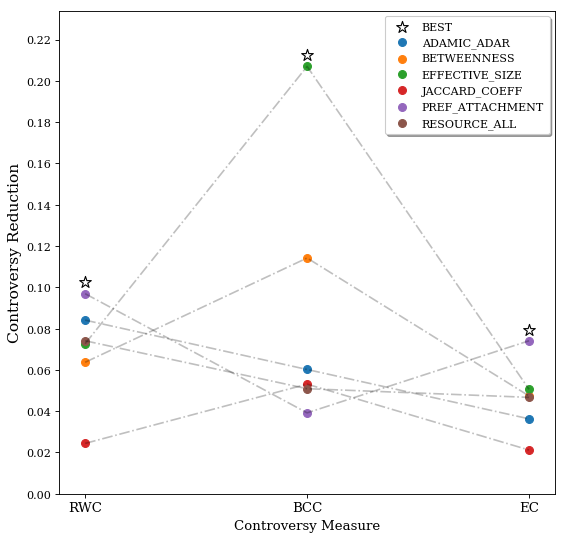

In [37]:
plt.subplots(1,1,figsize=(8,8), dpi=80)
plt.scatter([1,2,3],[0.1024, 0.2125,0.0795] ,marker="*", c= "White", s=120, label="BEST", linewidths= 1, edgecolors= "black")
for c in tmp_delta.columns:
    plt.scatter([1,2,3], tmp_delta[c], label = c, s=50)
plt.legend(frameon=True, framealpha=1, shadow=True, borderpad=0.5)
for c in tmp_delta.columns:
    plt.plot([1,2,3], tmp_delta[c], '-.k', alpha = 0.25)
plt.xticks([1,2,3], ['RWC', 'BCC', 'EC'], size=12)
plt.ylabel('Controversy Reduction',fontdict={'size':14})
plt.xlabel("Controversy Measure", fontdict={'size':12})
plt.yticks(np.arange(0,0.24,0.02))
#plt.savefig("final_evaluations.png", bbox_inches='tight')

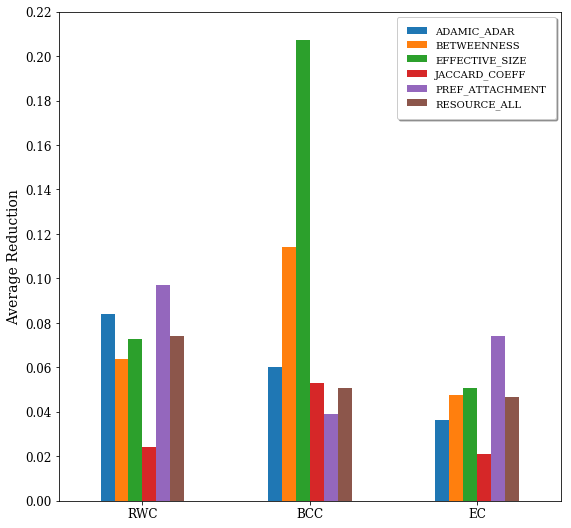

In [38]:
ax_final = tmp_delta.plot(kind="bar", figsize=(9,9), rot = 360, fontsize = 12, yticks=np.arange(0,0.24,0.02))
ax_final.set_ylabel("Average Reduction", fontdict={'size':14})
ax_final.legend(loc="best", frameon=True, framealpha=1, shadow=True, borderpad=1, fontsize="medium", fancybox = True)

In [39]:
# fig = ax_final.get_figure()
# fig.savefig("final_comparison.png", bbox_inches='tight')

In [40]:
results[(results["Controversial"] == "Y" )].groupby(['Algorithm']).mean().round(4)
# aggregated[(aggregated["Algorithm"] == "BETWEENNESS") | (aggregated["Algorithm"] == "EFFECTIVE_SIZE")]

,Unnamed: 0,RWC_pre,RWC_post,GMCK_pre,GMCK_post,ForceAtlas_pre,ForceAtlas_post,Original_edges,New_edges,Number_edges_added,Percentage_edges_added
Algorithm,,,,,,,,,,,
ADAMIC_ADAR,3,0.9033,0.8192,0.3323,0.2721,0.594,0.5577,139149,140149,1000,0.0007
BETWEENNESS,0,0.9033,0.8396,0.3323,0.2181,0.594,0.5466,139149,140149,1000,0.0007
EFFECTIVE_SIZE,1,0.9033,0.8306,0.3323,0.1253,0.594,0.5434,139149,140149,1000,0.0007
JACCARD_COEFFICIENT,2,0.9033,0.8789,0.3323,0.2792,0.594,0.5728,139149,140149,1000,0.0007
PREFERENTIAL_ATTACHMENT,5,0.9033,0.8064,0.3323,0.2931,0.594,0.5199,139149,140149,1000,0.0007
RESOURCE_ALLOCATION,4,0.9033,0.8292,0.3323,0.2814,0.594,0.5473,139149,140149,1000,0.0007


In [41]:
aggregated = tmp_delta.transpose()
aggregated['MEASURE'] = np.where((aggregated.index=="BETWEENNESS") | (aggregated.index=="EFFECTIVE_SIZE"), 'Communicability', 'Similarity')

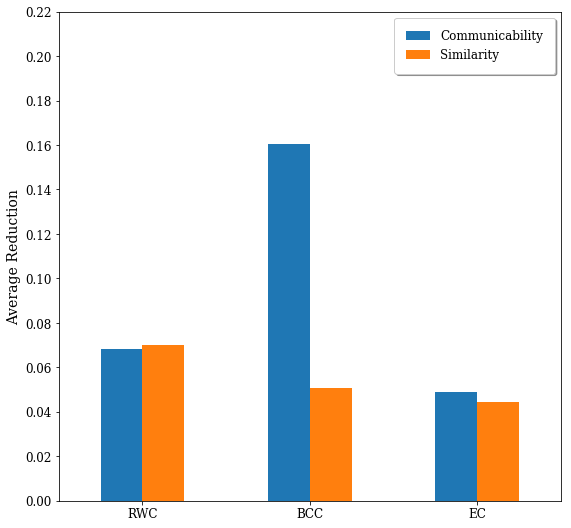

In [42]:
ax_final1 = aggregated.groupby("MEASURE").mean().transpose().plot(kind="bar", figsize=(9,9), rot = 360, fontsize = 12, yticks=np.arange(0,0.24,0.02))
ax_final1.set_ylabel("Average Reduction", fontdict={'size':14})
ax_final1.legend(loc="best", frameon=True, framealpha=1, shadow=True, borderpad=1, fontsize="large", fancybox = True)
# fig = ax_final1.get_figure()
# fig.savefig("final_comparison_aggregated.png", bbox_inches='tight')